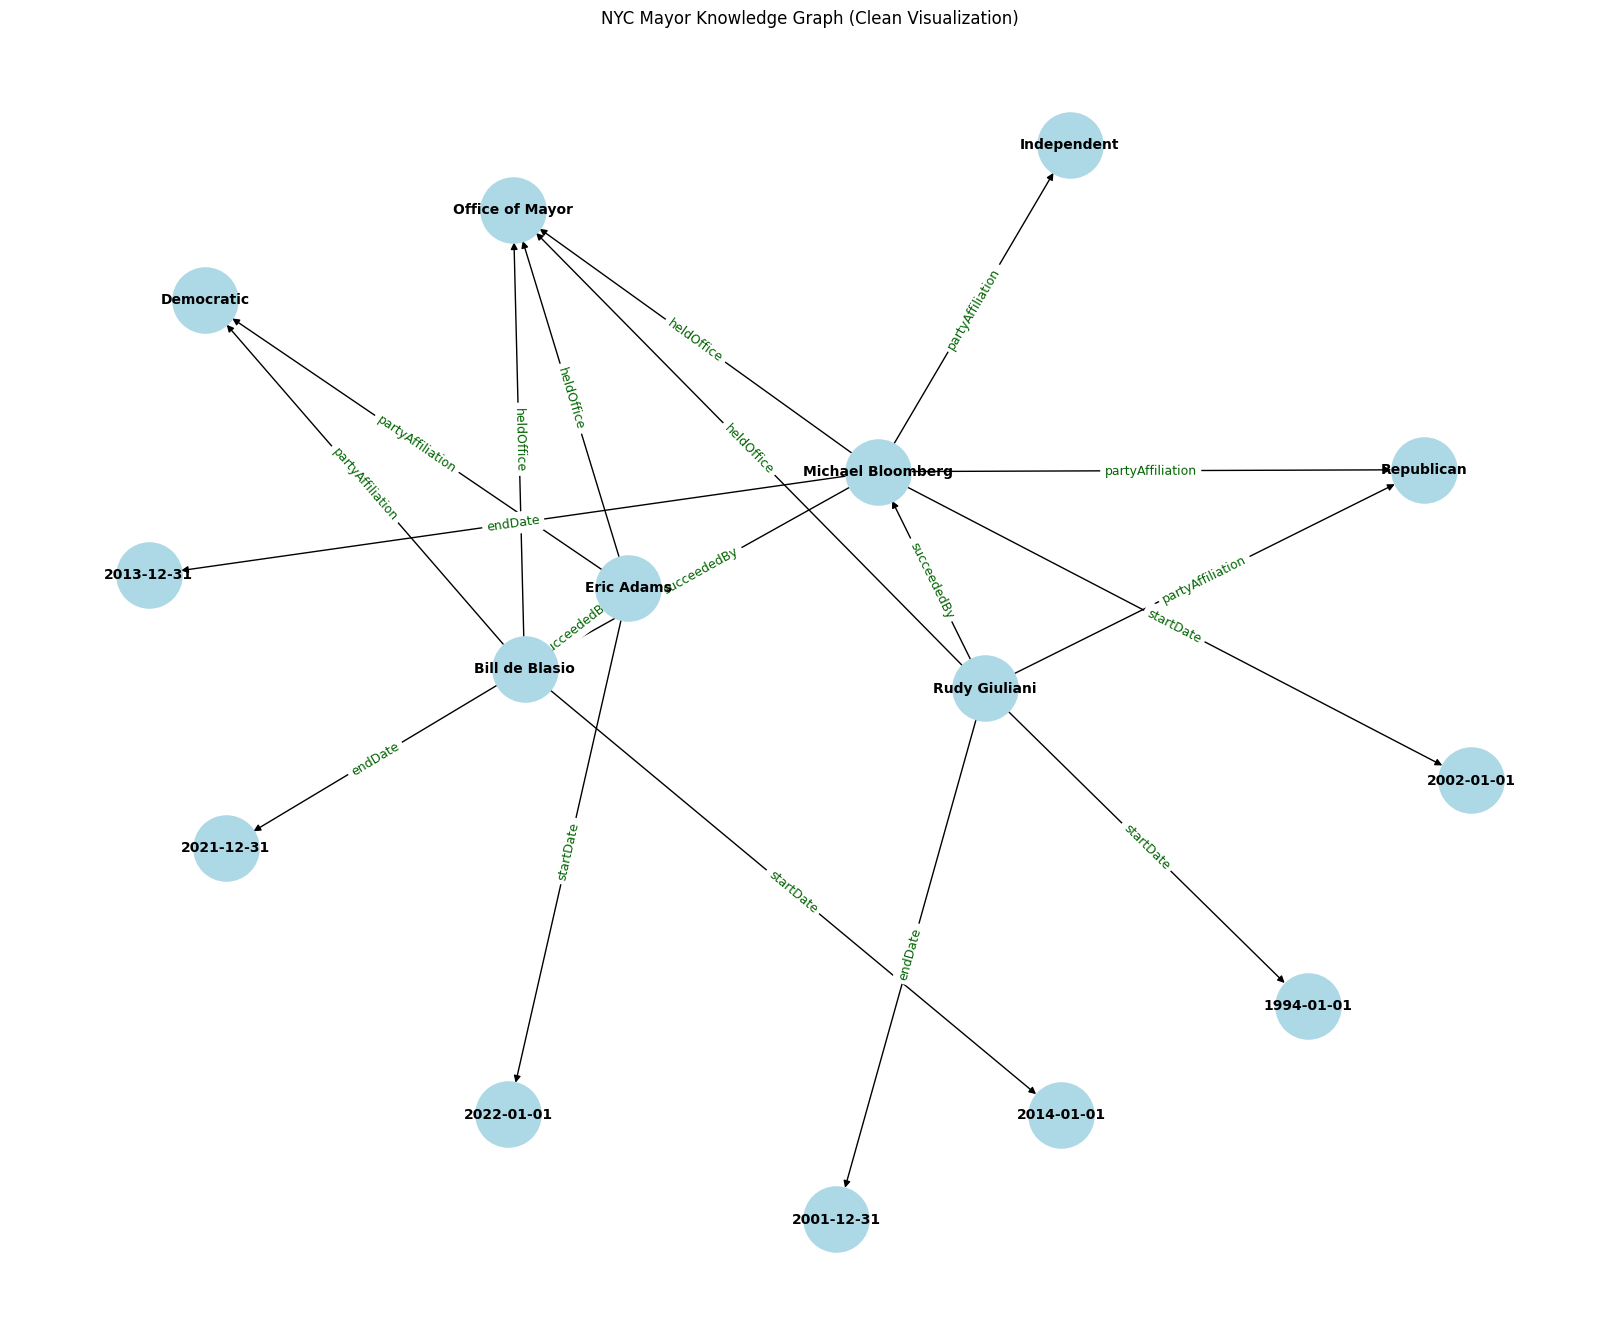

Turtle file saved as nycMayors.ttl


In [ ]:
from rdflib import Graph, Namespace, Literal
from rdflib.namespace import RDF, RDFS, XSD
import networkx as nx
import matplotlib.pyplot as plt

class NYCKnowledgeGraph:
    def __init__(self):
        self.graph = Graph()
        self.EX = Namespace("http://example.org/nyc/")
        self.graph.bind("ex", self.EX)

        self.define_classes()
        self.define_properties()
        self.create_instances()

    # -------------------------------
    # 1. Define Classes
    # -------------------------------
    def define_classes(self):
        self.graph.add((self.EX.Person, RDF.type, RDFS.Class))
        self.graph.add((self.EX.Mayor, RDF.type, RDFS.Class))
        self.graph.add((self.EX.PoliticalParty, RDF.type, RDFS.Class))
        self.graph.add((self.EX.GovernmentOffice, RDF.type, RDFS.Class))
        self.graph.add((self.EX.Term, RDF.type, RDFS.Class))

        # Mayor is a type of Person
        self.graph.add((self.EX.Mayor, RDFS.subClassOf, self.EX.Person))

    # -------------------------------
    # 2. Define Properties
    # -------------------------------
    def define_properties(self):
        self.graph.add((self.EX.partyAffiliation, RDF.type, RDF.Property))
        self.graph.add((self.EX.succeededBy, RDF.type, RDF.Property))
        self.graph.add((self.EX.heldOffice, RDF.type, RDF.Property))
        self.graph.add((self.EX.startDate, RDF.type, RDF.Property))
        self.graph.add((self.EX.endDate, RDF.type, RDF.Property))

    # -------------------------------
    # 3. Create Instances
    # -------------------------------
    def create_instances(self):
        # Parties
        republican = self.EX.Republican
        democrat = self.EX.Democratic
        independent = self.EX.Independent

        self.graph.add((republican, RDF.type, self.EX.PoliticalParty))
        self.graph.add((democrat, RDF.type, self.EX.PoliticalParty))
        self.graph.add((independent, RDF.type, self.EX.PoliticalParty))

        # Office
        office = self.EX.Office_of_Mayor
        self.graph.add((office, RDF.type, self.EX.GovernmentOffice))

        # Mayors
        giuliani = self.EX.Rudy_Giuliani
        bloomberg = self.EX.Michael_Bloomberg
        deblasio = self.EX.Bill_de_Blasio
        adams = self.EX.Eric_Adams

        mayors = [giuliani, bloomberg, deblasio, adams]
        for m in mayors:
            self.graph.add((m, RDF.type, self.EX.Mayor))

        # Party affiliations
        self.graph.add((giuliani, self.EX.partyAffiliation, republican))
        self.graph.add((bloomberg, self.EX.partyAffiliation, independent))
        self.graph.add((bloomberg, self.EX.partyAffiliation, republican))
        self.graph.add((deblasio, self.EX.partyAffiliation, democrat))
        self.graph.add((adams, self.EX.partyAffiliation, democrat))

        # Successions
        self.graph.add((giuliani, self.EX.succeededBy, bloomberg))
        self.graph.add((bloomberg, self.EX.succeededBy, deblasio))
        self.graph.add((deblasio, self.EX.succeededBy, adams))

        # Office holding
        for m in mayors:
            self.graph.add((m, self.EX.heldOffice, office))

        # Terms
        self.graph.add((giuliani, self.EX.startDate, Literal("1994-01-01", datatype=XSD.date)))
        self.graph.add((giuliani, self.EX.endDate, Literal("2001-12-31", datatype=XSD.date)))

        self.graph.add((bloomberg, self.EX.startDate, Literal("2002-01-01", datatype=XSD.date)))
        self.graph.add((bloomberg, self.EX.endDate, Literal("2013-12-31", datatype=XSD.date)))

        self.graph.add((deblasio, self.EX.startDate, Literal("2014-01-01", datatype=XSD.date)))
        self.graph.add((deblasio, self.EX.endDate, Literal("2021-12-31", datatype=XSD.date)))

        self.graph.add((adams, self.EX.startDate, Literal("2022-01-01", datatype=XSD.date)))

    # -------------------------------
    # CLEAN LABELS
    # -------------------------------
    def readable(self, uri):
        return uri.split("/")[-1].replace("_", " ")

    # -------------------------------
    # CLEAN VISUALIZATION (NEW)
    # -------------------------------
    def visualize_graph(self):
        """Visualizing triples"""
        nx_graph = nx.DiGraph()

        allowed_props = {
            self.EX.partyAffiliation,
            self.EX.succeededBy,
            self.EX.heldOffice,
            self.EX.startDate,
            self.EX.endDate
        }

        for s, p, o in self.graph:
            if p not in allowed_props:
                continue

            s_label = self.readable(s)
            p_label = self.readable(p)
            if isinstance(o, Literal):
                o_label = str(o)
            else:
                o_label = self.readable(o)

            nx_graph.add_edge(s_label, o_label, label=p_label)

        pos = nx.spring_layout(nx_graph, k=1.0, seed=42)
        plt.figure(figsize=(16, 13))

        nx.draw(
            nx_graph, pos,
            with_labels=True,
            node_color="lightblue",
            node_size=2200,
            font_size=10,
            font_weight="bold"
        )

        edge_labels = nx.get_edge_attributes(nx_graph, "label")
        nx.draw_networkx_edge_labels(
            nx_graph, pos,
            edge_labels=edge_labels,
            font_size=9,
            font_color="darkgreen"
        )

        plt.title("NYC Mayor Knowledge Graph (Clean Visualization)")
        plt.show()

    # -------------------------------
    # Save Turtle File
    # -------------------------------
    def save_turtle(self, filename="nycMayors.ttl"):
        self.graph.serialize(filename, format="turtle")
        print(f"Turtle file saved as {filename}")


# Run the KG
kg = NYCKnowledgeGraph()
kg.visualize_graph()
kg.save_turtle()
